# Определение перспективного тарифа для телеком-компании

## Задача

Заказчик - федеральный оператор сотовой связи компании «Мегалайн». Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Нужно проанализировать поведение клиентов и сделать вывод, какой тариф приносит больше денег. Результаты исследования будут учтены при корректировке рекламного бюджета.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Описание тарифов.
- Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
- Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.
Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


##  Изучение общей информации

Путь к файлам:

- /datasets/calls.csv
- /datasets/internet.csv
- /datasets/messages.csv
- /datasets/tariffs.csv
- /datasets/users.csv

Импортируем pandas и другие библиотеки, переносим данные из файлов в датафреймы.

In [1]:
import pandas as pd         # Импортируем необходимые библиотеки 
import numpy as np  
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings             # отключили предупреждения         
warnings.filterwarnings('ignore')                   

In [2]:
data_calls = pd.read_csv('calls.csv')
data_internet = pd.read_csv('internet.csv')
data_messages = pd.read_csv('messages.csv')
data_tariffs = pd.read_csv('tariffs.csv')
data_users = pd.read_csv('users.csv')

Из описания данных имеем следующую информацию:

Таблица users (информация о пользователях):
•	user_id — уникальный идентификатор пользователя
•	first_name — имя пользователя
•	last_name — фамилия пользователя
•	age — возраст пользователя (годы)
•	reg_date — дата подключения тарифа (день, месяц, год)
•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
•	city — город проживания пользователя
•	tarif — название тарифного плана

Таблица calls (информация о звонках):
•	id — уникальный номер звонка
•	call_date — дата звонка
•	duration — длительность звонка в минутах
•	user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
•	id — уникальный номер сообщения
•	message_date — дата сообщения
•	user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
•	id — уникальный номер сессии
•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
•	session_date — дата интернет-сессии
•	user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
•	tariff_name — название тарифа
•	rub_monthly_fee — ежемесячная абонентская плата в рублях
•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
•	messages_included — количество сообщений в месяц, включённых в абонентскую плату
•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета
•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [3]:
data_users.info()  # Данные о пользователях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
display(data_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Имеем 500 строк, 8 столбцов; только в столбце 'churn_date' есть пропущенные значения, но они означают, что тариф ещё действовал на момент выгрузки данных. Кроме столбцов дат формат соответствует содержимому данных.

In [5]:
print(data_users['tariff'].unique())             # Вывели список уникальных значений столбца тарифа

['ultra' 'smart']


Итак, кроме 'ultra' и 'smart' других случайных значений нет.

In [6]:
data_calls.info()  # Данные о звонках
display(data_calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


В таблице 202 607 строк (звонков), 4 столбца; пропущенных значений нет, есть нулевая длительность звонка - это пропущенные звонки. Тип 'call_date' - object.

Длительность звонков дана в минутах с дробной частью. Так как по условиям тарифа для минут идет округление в большую сторону, округлим эти значения. Используем math.ceil().

Затем полученные целые значения переведем в тип int.

In [7]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil)   # округлили в большую сторону

display(data_calls.head())                                       # смотрим, что получилось 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [8]:
data_calls['duration'] = data_calls['duration'].astype(int)         # привели к целочисленному типу

In [9]:
data_internet.info()                                                # Данные об использовании интернет-трафика

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
display(data_internet.head()) 

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Прмимо заявленных столбцов id, mb_used, session_date, user_id присутствует столбец с неизвестными значениями 'Unnamed: 0'.

In [11]:
display(data_internet.tail())                              # Напечатали последние строки таблицы

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Столбец `Unnamed: 0` дублирует индекс. Дело в том, что таблица уже содержала в себе столбец с индексами, а пандас при чтении добавил еще один. Так как никакой дополнительной информации он не несет, можем удалить.
В результате получим датафрейм с 149 395 строками и 4 столбцами. Аналогично предыдущим таблицам дата представлена как object.

In [12]:
data_internet.drop('Unnamed: 0', axis=1) #  Удалили столбец


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Объем трафика в Мб представлен числом с дробной частью. Так как по условиям тарифа для мегабайтов идет округление в большую сторону, округлим эти значения.
Затем полученные целые значения переведем в тип int.

In [13]:
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil).astype(int)

data_internet.info()                    # Проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    149396 non-null  int64 
 1   id            149396 non-null  object
 2   mb_used       149396 non-null  int32 
 3   session_date  149396 non-null  object
 4   user_id       149396 non-null  int64 
dtypes: int32(1), int64(2), object(2)
memory usage: 5.1+ MB


In [14]:
data_messages.info()                       # Данные о СМС

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Датафрейм размера 123 036 строк на 3 столбца. Аналогично предыдущему без пропущенных значений, дата типа object.

In [15]:
data_tariffs.info()                        # Данные тарифных планах
display(data_tariffs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Всего две строки - описание тарифных планов. Что включено: сообщений, МБ, минут. Стоимость сверх пакета. Все значения кроме имени тарифа целочисленны, пропусков нет.


## Подготовка данных

Приведем данные к нужным типам, если потребуется. Попробуем найти и исправить ошибки в данных, если они есть.

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.


### Предварительная подготовка данных
Приведем столбцы дат к соотвествующему типу во всех таблицах. Начнем с таблицы data_users.

In [16]:
data_users['reg_date'] = (pd.
                          to_datetime(data_users['reg_date'],  # заменили тип на datetime
                                      format='%Y-%m-%d'
                                     )            
                         )
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [17]:
print(data_users['reg_date'].min(), 
      data_users['reg_date'].max()
     )                                   # узнаем охват дат регистрации

2018-01-01 00:00:00 2018-12-31 00:00:00


Так как охвачен весь диапазон 2018 года, можно заменить пропущенные значения в столбце 'churn_date' (дата прекращения пользования тарифом) на 2018-12-31, помня, что теперь это столбец означает дату последнего пользования тарифом в 2018 году. Можно было бы добавить такой новый столбец, но в поставленной задаче заполнения пропусков в имеющемся вполне достаточно.

Столбец 'reg_date' пропусков не имеет.

In [18]:
data_users['churn_date'] = (data_users['churn_date'].
                            fillna('2018-12-31')                    # замена пропусков
                           )
data_users['churn_date'] = (pd.
                            to_datetime(data_users['churn_date'],   # заменили тип на datetime
                                        format='%Y-%m-%d'
                                       )     
                           )

data_users.info()                                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Изменили тип на соответствующий представлению дат datetime64 и избавились от пропущенных значений.

Аналогично изменим тип в оставшихся трех таблицах.

In [19]:
data_calls['call_date'] = (pd.
                           to_datetime(data_calls['call_date'],   # заменили тип на datetime
                                       format='%Y-%m-%d'
                                      )  
                          )
data_messages['message_date'] = (pd.
                                 to_datetime(data_messages['message_date'], 
                                             format='%Y-%m-%d'
                                            )
                                )
data_internet['session_date'] = (pd.
                                 to_datetime(data_internet['session_date'], 
                                             format='%Y-%m-%d'
                                            )
                                )

Посмотрим, какую еще информацию мы можем получить из таблиц. Например, интересует, нет ли отрицательных значений. Используем describe(). В data_messages только идентификатор пользователя, дата сессии и уникальный номер сообщения, describe() не нужен.

In [20]:
print(data_users.describe(), '\n')
print(data_calls.describe(), '\n')
print(data_internet.describe())

           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000 

            duration        user_id
count  202607.000000  202607.000000
mean        7.158198    1253.940619
std         5.959173     144.722751
min         0.000000    1000.000000
25%         2.000000    1126.000000
50%         6.000000    1260.000000
75%        11.000000    1379.000000
max        38.000000    1499.000000 

          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.622098    1252.099842
std     43127.054745     278.387019     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     139.000000    1130.000000
50%     74697.500000     349.000000    1251.000000
75%    112046.250000     560.000000    1380.0

Функция describe() описала нам все числовые значения:
- отрицательных нет; 
- возраст в пределах нормы от 18 до 75 лет;  
- user_id от 1000 до 1499; 
- максимальные значения в пределах допустимого; 
- нулевые значения в звонках означают пропущенные звонки (с нулевой длительностью); 
- нулевые значения в интернет-трафике - это просто нулевой трафик.

Поясню чуть подробнее с интернет-трафиком. Сессии интернет-трафика размером 0 Мб можно не считать ошибкой или пропуском и не пытаться их заполнить. Первый вариант: в этот день не было выхода в интернет вообще. Второй вариант: если были другие ненулевые сессии в этот день. У большинства операторов есть не тарифицируемый порог трафика, возникающий, чаще всего, при переподключении с 3G на 4G и обратно. Каждый раз, когда ваш телефон принимает или совершает голосовой вызов, он автоматически переключается из режима 4G в режим 3G из-за особенностей LTE - это технология только для передачи данных. После завершения голосового вызова телефон снова переключается в режим 4G. Это может происходить и при выключенном интернете. 

Так гласит всезнающий интернет, но и собственный опыт говорит о том, что нулевые сессии бывают. Поэтому считаем сессии 0 Мб допустимыми и не тарифицируемыми (не влияющими на нашу статистику и выручку с пользователя).

Посмотрим, есть ли дубликаты в таблице (по идентификаторам звонков / сообщений / сессий).

In [21]:
print('Дубликатов в таблице "users":', data_users.duplicated().sum())
print('Дубликатов в таблице "calls":', data_calls.duplicated().sum()) 
print('Дубликатов в таблице "messages":', data_messages.duplicated().sum())
print('Дубликатов в таблице "internet":', data_internet.duplicated().sum())

Дубликатов в таблице "users": 0
Дубликатов в таблице "calls": 0
Дубликатов в таблице "messages": 0
Дубликатов в таблице "internet": 0


Вывод: имеем только уникальные данные.

Добавим в каждую из таблиц с данными по звонкам, сообщениям, трафику дополнительный столбец с номером месяца, так как анализ в дальнейшем пойдет по месяцам.

In [22]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month  # Использовали класс DatetimeIndex
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

### Создание сводных таблиц
Посчитаем для каждого пользователя:
- количество израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;

In [23]:
# количество израсходованных минут разговора по месяцам

duration_calls = (data_calls.
                  groupby(['user_id', 'month']).
                  agg({'duration': 'sum'}).
                  fillna(0).
                  reset_index()
                 )
display(duration_calls.head())

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


Аналогично создадим таблицы по месяцам и пользователям для количества сообщений и объема трафика.

In [24]:
     # количество отправленных сообщений по месяцам

count_messages = (data_messages.
                  groupby(['user_id', 'month']).
                  agg({'id': 'count'}).
                  fillna(0).
                  reset_index()
                 ) 

count_messages.columns = ['user_id', 'month', 'messages']  # Переименовали столбец для большей наглядности
display(count_messages.head())

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [25]:
     # объем израсходованного интернет-трафика по месяцам

mb_traffic = (data_internet.
              groupby(['user_id', 'month']).
              agg({'mb_used': 'sum'}).
              fillna(0).
              reset_index()
             ) 
display(mb_traffic.head()) # посмотрим, что получилось

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


Ежемесячный интернет-трафик необходимо округлить согласно правилам "Мегалайн" (мегабайты до гигабайт).
Напишем функцию перевода. Мегабайты нужно поделить на 1024 и округлить. Поступим аналогично округлению в большую сторону, как для минут, но прибавим не половину от 1024 , то есть 512, а чуть меньше - 511,5, поскольку плавающая запятая в результете деления вносит свои коррективы и при делении 1024 на 1024 дает чуть больше 1 где-то в десятитысячных долях.

In [26]:
def conversion_mb_gb(mb):           # Объявим функцию
    return round((mb+511.5)/1024)

                                    # Применим ее ко всем элементам и изменим тип на int:      
mb_traffic['gb_used'] = (mb_traffic['mb_used'].
                         apply(conversion_mb_gb).
                         astype(int)
                        ) 
                                                  

Теперь посмотрим, как сработал код функции.

In [27]:
display(mb_traffic.head())

,user_id,month,mb_used,gb_used
0,1000,5,2256,3
1,1000,6,23257,23
2,1000,7,14016,14
3,1000,8,14070,14
4,1000,9,14581,15


Итак, имеем три новые сводные таблицы. 

В них включены только те месяцы, когда совершались звонки или другие действия. Период до и после действия договора нас не интересует. Могли быть не включены в таблицу месяцы, если не было никакой активности, и, по идее, за них тоже надо взимать плату как за пакет согласно тарифу. Но вычислять их мы не будем, а будем условно считать, что на период отпуска без связи все услуги были приостановлены, если таковое имело место. Тогда плата логично не будет посчитана (условно равна 0).

Для дальнейших целей (вычислить помесячную выручку с каждого пользователя) необходимо объединить их по user_id и month. За основную возьмем таблицу users (информация о пользователях). 

In [28]:
united_data = (duration_calls.
               merge(count_messages, 
                     on=['user_id', 'month'], 
                     how='outer'
                    ).
               merge(mb_traffic, 
                     on=['user_id', 'month'], 
                     how='outer'
                    )
              )

print('Размер таблицы:', united_data.shape)
display(united_data.head())

Размер таблицы: (3214, 6)


,user_id,month,duration,messages,mb_used,gb_used
0,1000,5,159.0,22.0,2256.0,3.0
1,1000,6,172.0,60.0,23257.0,23.0
2,1000,7,340.0,75.0,14016.0,14.0
3,1000,8,408.0,81.0,14070.0,14.0
4,1000,9,466.0,57.0,14581.0,15.0


В таблице могут оказаться пропущенные значения. Заменим их на 0. Затем проверим.

In [29]:
print('Количество пропусков до:', united_data.isna().sum().sum())

united_data = united_data.fillna(0)
print('Количество пропусков после:', united_data.isna().sum().sum())

Количество пропусков до: 559
Количество пропусков после: 0


Объединим сводную таблицу с данными абонентов, добавим два столбца (месяцы регистрации и расторжения договора) и разобьем полученное на две таблицы согласно тарифу, так как в дальнейшем мы будем сравнивать эти два датафрейма.

In [30]:
united_data = (data_users.
               merge(united_data, 
                     on=['user_id'], 
                     how='outer').
               fillna(0)  # Объединяем таблицы
              )


In [31]:
data_smart = united_data.loc[united_data['tariff'] == 'smart'] # разбили на две таблицы согласно тарифу
data_ultra = united_data.loc[united_data['tariff'] == 'ultra']

### Подсчет ежемесячной платы 

Теперь, наконец, посчитаем помесячную выручку с каждого пользователя - плату за месяц. Вычтем пакеты из суммарной длительности звонков, количества сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

Для нахождения остатка минут нам необходимо найти максимум из значений "0" и разности длительности звонков и размера пакета. 

Зададим значения переменных - условия тарифов.

In [32]:
# Цены сверх пакетов
minute_smart = data_tariffs.rub_per_minute[0]    # 0 - Smart
minute_ultra = data_tariffs.rub_per_minute[1]    # 1 - Ultra
message_smart = data_tariffs.rub_per_message[0]
message_ultra = data_tariffs.rub_per_message[1]
gb_smart = data_tariffs.rub_per_gb[0]
gb_ultra = data_tariffs.rub_per_gb[1]

# Пакеты
pack_minute_smart = data_tariffs.minutes_included[0] 
pack_minute_ultra = data_tariffs.minutes_included[1]
pack_message_smart = data_tariffs.messages_included[0]
pack_message_ultra = data_tariffs.messages_included[1]
pack_gb_smart = data_tariffs.mb_per_month_included[0]/1024 # Так как данные в таблице data_tariffs в Мб, перевели в Гб
pack_gb_ultra = data_tariffs.mb_per_month_included[1]/1024

# Ежемесячная плата
pay_smart = data_tariffs.rub_monthly_fee[0]
pay_ultra = data_tariffs.rub_monthly_fee[1] 

In [33]:
data_smart['pay'] = (
    np.maximum(0, data_smart['duration'] - pack_minute_smart) * minute_smart  
    + np.maximum(0, data_smart['messages'] - pack_message_smart) * message_smart 
    + np.maximum(0, data_smart['gb_used'] - pack_gb_smart) * gb_smart 
    + pay_smart
)

data_ultra['pay'] = (
    np.maximum(0, data_ultra['duration'] - pack_minute_ultra) * minute_ultra 
    + np.maximum(0, data_ultra['messages'] - pack_message_ultra) * message_ultra 
    + np.maximum(0, data_ultra['gb_used'] - pack_gb_ultra) * gb_ultra 
    + pay_ultra
)

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. 
- Сколько минут разговора требуется пользователям каждого тарифа в месяц.
- Сколько сообщений и какой объём интернет-трафика необходим? 

- Посчитаем среднее количество, дисперсию и стандартное отклонение. 
- Построим гистограммы, опишем распределения.

### Диаграммы

Text(0, 0.5, 'Среднее количество минут')

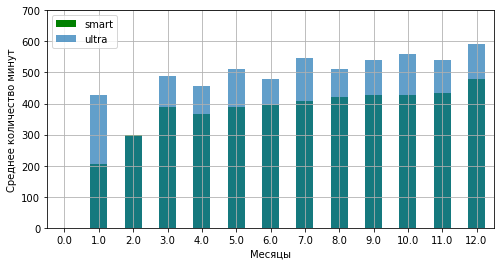

In [34]:
ax = (data_smart.               # Smart                        # применили присвоение параметру ax первой диаграммы, 
      pivot_table(index='month',                               # чтобы вывести обе на одном графике
                  values='duration', 
                  aggfunc='mean'
                 ).
      plot(kind='bar', 
           figsize=(8, 4), 
           grid=True, 
           ylim=(0, 700), 
           color='green'
          )                
     )

(data_ultra.                    # Ultra
 pivot_table(index='month', 
             values='duration', 
             aggfunc='mean'
            ).
 plot(kind='bar', 
      figsize=(8, 4), 
      grid=True, 
      ylim=(0, 700), 
      rot=0, 
      alpha=0.7, 
      ax=ax)           
)

plt.legend(['smart', 'ultra'])
plt.xlabel('Месяцы')                   # Подписали ось X
plt.ylabel('Среднее количество минут') # Подписали ось Y

Как видим, в среднем пользователи тарифа "Ультра" говорят примерно по 500 минут в месяц, что на 100 минут в месяц больше, чем пользователи тарифа "Смарт". В обеих группах к концу года число минут незначительно растет. И если пользователи "Смарт" в среднем лишь немного не "дотягивают" до полного пакета в 500 минут, то пользователи "Ультра" не используют и одной пятой части своего пакета в 3000 минут.

Text(0, 0.5, 'Среднее количество сообщений')

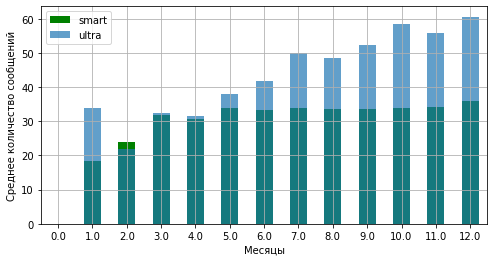

In [35]:
ax = (data_smart.                       # Smart
      pivot_table(index='month', 
                  values='messages', 
                  aggfunc='mean'
                 ).
      plot(kind='bar', 
           figsize=(8, 4), 
           grid=True, 
           color='green'
          )                
     )

(data_ultra.                            # Ultra
 pivot_table(index='month', 
             values='messages', 
             aggfunc='mean'
            ).
 plot(kind='bar', 
      figsize=(8, 4), 
      grid=True, 
      rot=0, 
      alpha=0.7, 
      ax=ax)             
)

plt.legend(['smart', 'ultra'])
plt.xlabel('Месяцы')                         # Подписали ось абсцисс X
plt.ylabel('Среднее количество сообщений')   # Ось ординат Y

На диаграмме с числом сообщений примерно такая картина: в среднем пользователи тарифа "Смарт" стабильно посылают около 35 сообщений в месяц, а пользователи тарифа "Ультра"на 5-10 штук больше, а в феврале даже меньше. Число отправленных сообщений у "Ультра" к концу года увеличивается. Обе группы в среднем не выходят на пределы своих пакетов, а у "Ультра" не используется и 1/20 часть пакета.

Text(0, 0.5, 'Среднее количество Гб')

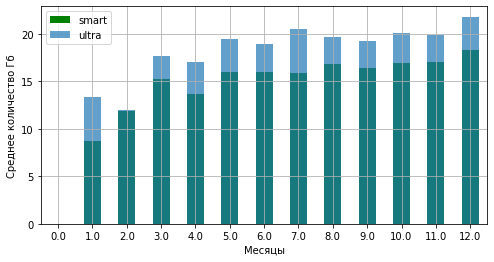

In [36]:
ax = (data_smart.                               # Smart
      pivot_table(index='month', 
                  values='gb_used', 
                  aggfunc='mean'
                 ).
      plot(kind='bar', 
           figsize=(8, 4), 
           grid=True, 
           color='green')                
     )

(data_ultra.                                    # Ultra
 pivot_table(index='month', 
             values='gb_used', 
             aggfunc='mean'
            ).
 plot(kind='bar', 
      figsize=(8, 4), 
      grid=True, 
      rot=0, 
      alpha=0.7, 
      ax=ax)            
)

plt.legend(['smart', 'ultra'])
plt.xlabel('Месяцы')                           # Подписали ось X
plt.ylabel('Среднее количество Гб')            # Подписали ось Y

На диаграмме с объемом интернет-трафика среднее достаточно стабильно находится в районе 20 Гб для "Ультра" и около 17 Гб для "Смарт".  И если пользователи "Смарт" в среднем превышают трафик из своего пакета на 2-3 Гб, то пользователи "Ультра" используют около 2/3 пакета Гб.

Предварительная гипотеза: пользователи тарифа "Ультра" не переплачивают сверх своей абонентской платы, а пользователи тарифа "Смарт" достаточно часто переплачивают за интернет-трафик сверх своего пакета.

### Среднее количество, дисперсия и стандартное отклонение

In [37]:
data_smart.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2230.0,1246.562332,146.110501,1001.0,1121.00,1240.0,1376.0,1499.0
age,2230.0,46.557848,16.349865,18.0,32.00,47.0,62.0,75.0
month,2230.0,8.343049,2.925006,0.0,6.00,9.0,11.0,12.0
duration,2230.0,417.747534,190.476754,0.0,282.00,421.5,545.0,1435.0
messages,2230.0,33.369058,28.230396,0.0,10.00,28.0,51.0,143.0
mb_used,2230.0,16221.910762,5886.299627,0.0,12645.25,16529.0,20068.0,38610.0
gb_used,2230.0,16.352018,5.767620,0.0,13.00,17.0,20.0,38.0
pay,2230.0,1294.305381,820.900496,550.0,550.00,1037.0,1750.0,6770.0


Данные говорят о том, что для тарифа "Смарт" и число минут, и сообщений, и Гб может превышать пакет (это max). Сверх тарифа не переплачивает только четверть пользователей (первый квартиль), медиана превышает абонентскую плату вдвое, а третий квартиль втрое. 

In [38]:
data_ultra.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,986.0,1262.957404,140.689268,1000.0,1143.0,1277.0,1381.00,1495.0
age,986.0,46.838742,17.099807,18.0,30.0,45.0,63.00,75.0
month,986.0,8.242394,2.882305,0.0,6.0,9.0,11.00,12.0
duration,986.0,526.089249,317.887549,0.0,282.5,518.0,751.75,1673.0
messages,986.0,49.313387,47.806040,0.0,6.0,38.0,78.75,224.0
mb_used,986.0,19467.137931,10110.255401,0.0,11761.0,19320.0,26860.25,49789.0
gb_used,986.0,19.506085,9.880425,0.0,12.0,19.0,27.00,49.0
pay,986.0,2070.943205,378.629673,1950.0,1950.0,1950.0,1950.00,4800.0


По числу минут и сообщений никто из пользователей "Ультра" не выходит за пределы пакета, а вот за интернет-трафик переплатить могут. При этом даже пользователи в пределах третьего квартиля платят только абонентскую плату.

Число пользователей, пользующихся тарифом "Смарт" более чем в два раза превышает пользователей "Ультра".

Функция describe() уже подсчитала стандартное отклонение выборки, но можем посчитать дисперсию и стандартное отклонение методами библиотеки numpy.

In [39]:
variance_estimate_smart = np.var(data_smart['pay'], 
                                 ddof=1
                                )                        # Считаем дисперсию по выборке

standard_dev_smart = np.std(data_smart['pay'], 
                            ddof=1
                           )                             # Стандартное отклонение по выборке

print('Дисперсия для выборки Smart:', 
      int(variance_estimate_smart)                       # отбрасываем цифры после запятой
     )  
print('Стандартное отклонение для выборки Smart:', 
      int(standard_dev_smart)
     )

Дисперсия для выборки Smart: 673877
Стандартное отклонение для выборки Smart: 820


In [40]:
variance_estimate_ultra = np.var(data_ultra['pay'], 
                                 ddof=1
                                )                        # Считаем дисперсию по выборке

standard_dev_ultra = np.std(data_ultra['pay'], 
                            ddof=1
                           )                             # Стандартное отклонение по выборке

print('Дисперсия для выборки Ultra:', 
      int(variance_estimate_ultra)
     )
print('Стандартное отклонение для выборки Ultra:', 
      int(standard_dev_ultra)
     )

Дисперсия для выборки Ultra: 143360
Стандартное отклонение для выборки Ultra: 378


Для выборки "Ультра" стандартное отклонение (показатель рассеивания значений) в два раза меньше, чем для "Смарт". Это означает, что плата по тарифу "Ультра" менее подвержена скачкам, что хорошо видно и по значениям: минимум, 1й, 2й и 3й квартили равны ежемесячной плате - 1950 руб.

Добавим дисперсию и std.
    
Стандартное отклонение std получено для обоих тарифов для всех столбцов с помощью метода describe() и соответствует посчитанному с помощью np.std. Поэтому можно вывести на экран стандартное отклонение из describe() и дисперсию как квадрат стандартного отклонения по очередности для длительности звонков, количества СМС и потраченных Гб. Либо можно с помощью np.var и np.std. Используем оба варианта.


In [41]:
duration_standard_dev_smart = data_smart['duration'].describe()['std']  # Стандартное отклонение 
duration_variance_estimate_smart = duration_standard_dev_smart ** 2     # Дисперсия

print('Дисперсия длительности звонка для Smart:', round(duration_variance_estimate_smart))
print('Стандартное отклонение длительности звонка для Smart:', round(duration_standard_dev_smart))


duration_standard_dev_ultra = data_ultra['duration'].describe()['std']  # Стандартное отклонение 
duration_variance_estimate_ultra = duration_standard_dev_ultra ** 2     # Дисперсия

print('\nДисперсия длительности звонка для Ultra:', round(duration_variance_estimate_ultra))
print('Стандартное отклонение длительности звонка для Ultra:', round(duration_standard_dev_ultra))

Дисперсия длительности звонка для Smart: 36281
Стандартное отклонение длительности звонка для Smart: 190

Дисперсия длительности звонка для Ultra: 101052
Стандартное отклонение длительности звонка для Ultra: 318



Видим, что разброс звонков вокруг среднего значения у тарифа Smart в полтора раза меньше, чем у Ultra.
    
Найдем теперь дисперсию и стандартное отклонение для сообщений и интернет-трафика.

In [42]:
messages_standard_dev_smart = data_smart['messages'].describe()['std']  # Стандартное отклонение 
messages_variance_estimate_smart = messages_standard_dev_smart ** 2     # Дисперсия

print('Дисперсия количества сообщений для Smart:', round(messages_variance_estimate_smart))
print('Стандартное отклонение количества сообщений для Smart:', round(messages_standard_dev_smart))


messages_standard_dev_ultra = data_ultra['messages'].describe()['std']  # Стандартное отклонение 
messages_variance_estimate_ultra = messages_standard_dev_ultra ** 2     # Дисперсия

print('\nДисперсия количества сообщений для Ultra:', round(messages_variance_estimate_ultra))
print('Стандартное отклонение количества сообщений для Ultra:', round(messages_standard_dev_ultra))

Дисперсия количества сообщений для Smart: 797
Стандартное отклонение количества сообщений для Smart: 28

Дисперсия количества сообщений для Ultra: 2285
Стандартное отклонение количества сообщений для Ultra: 48


Разброс количества сообщений вокруг среднего у тарифа Smart тоже примерно в полтора раза меньше, чем у Ultra.


In [43]:
print('Дисперсия интернет-трафика для Smart:', round(np.var(data_smart['gb_used'])))              # Дисперсия
print('Стандартное отклонение интернет-трафика для Smart:', round(np.std(data_smart['gb_used']))) # Стандартное отклонение 

print('\nДисперсия интернет-трафика для Ultra:', round(np.var(data_ultra['gb_used'])))            # Дисперсия
print('Стандартное отклонение интернет-трафика для Ultra:', round(np.std(data_ultra['gb_used']))) # Стандартное отклонение 

Дисперсия интернет-трафика для Smart: 33
Стандартное отклонение интернет-трафика для Smart: 6

Дисперсия интернет-трафика для Ultra: 98
Стандартное отклонение интернет-трафика для Ultra: 10



И для гигабайт мы снова наблюдаем подобную картину, стандартное отклонение у тарифа Smart тоже примерно в полтора раза меньше, чем у Ultra.
    
Общий вывод: у пользователей тарифа Ultra разброс использованных возможностей связи примерно в полтора раза выше, чем у пользователей тарифа Smart, и их действия более непредсказуемы.


### Гистограммы

Построим гистограмму для выручки с пользователей разных тарифов.

Text(0.5, 0, 'Оплата, руб')

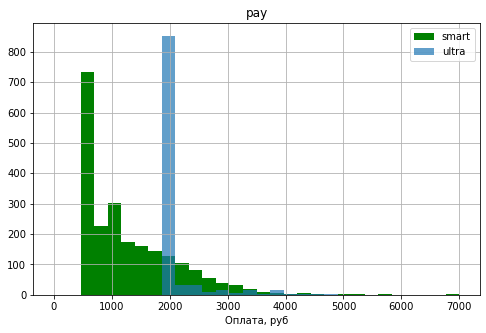

In [44]:
ax = (data_smart.
      hist('pay', 
           bins=30, 
           figsize=(8, 5), 
           range=(0, 7000), 
           color='green'
          )
     )
      
(data_ultra.
 hist('pay', 
      bins=30, 
      figsize=(8, 5), 
      range=(0, 7000), 
      ax=ax,       # присвоили ax=ax
      alpha=0.7)
)

plt.legend(['smart', 'ultra'])

plt.xlabel('Оплата, руб') #  ось X

Обе гистограммы похожи на распределение Пуассона. 

Text(0.5, 0, 'Длительность звонков, мин')

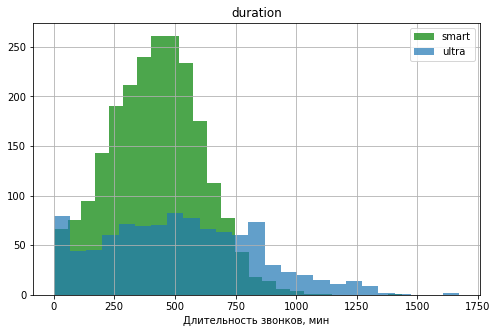

In [45]:
ax = (data_smart.
      hist('duration', 
           bins=25,
           figsize=(8, 5), 
           color='green', 
           alpha=0.7
          )  
     )
      
(data_ultra.
 hist('duration', 
      bins=25, 
      figsize=(8, 5), 
      ax=ax, 
      alpha=0.7)
)

plt.legend(['smart', 'ultra'])
plt.xlabel('Длительность звонков, мин')   #  ось X

Звонки у тарифа Smart больше похожи на нормальное распределение с пиком как раз в районе пакета минут. А вот у Ultra характер распределения не понятен.

Text(0.5, 0, 'Количество сообщений')

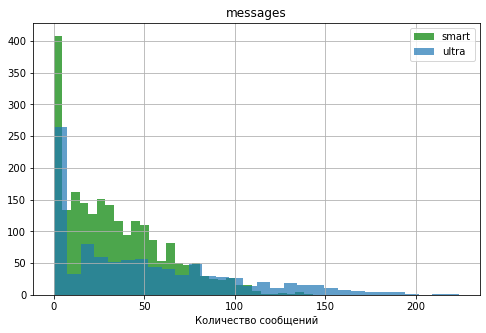

In [46]:
ax = (data_smart.
      hist('messages', 
           bins=30, 
           figsize=(8, 5), 
           color='green', 
           alpha=0.7
          )
     )
      
(data_ultra.
 hist('messages', 
      bins=30, 
      figsize=(8, 5), 
      ax=ax, 
      alpha=0.7
     )
)

plt.legend(['smart', 'ultra'])
plt.xlabel('Количество сообщений') #  ось X

Text(0.5, 0, 'Интернет-трафик, Гб')

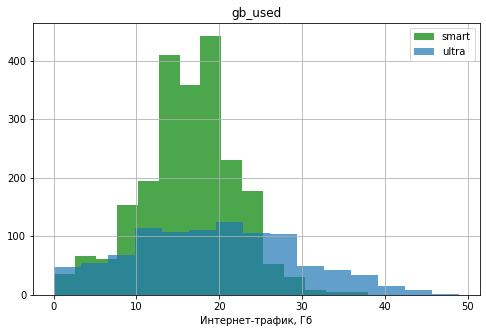

In [47]:
ax = (data_smart.
      hist('gb_used', 
           bins=15, 
           figsize=(8, 5), 
           color='green', 
           alpha=0.7
          )
     )
      
(data_ultra.
 hist('gb_used', 
      bins=15, 
      figsize=(8, 5), 
      ax=ax, 
      alpha=0.7
     )
)

plt.legend(['smart', 'ultra'])
plt.xlabel('Интернет-трафик, Гб')   # ось X


Гистограммы по количеству сообщений и по гигабайтам трафика подтверждают полученный ранее из величин стандартного отклонения вывод, что разброс у Ultra выше, чем у тарифа Smart - "хвосты" у Ultra длиннее, явных пиков нет.



## Проверка гипотез
Проверим две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


Формулировка нулевой гипотезы звучит либо как "среднее совокупности равно конкретному значению", либо как "средние значения совокупностей равны между собой", то есть всегда используется знак равенства. У нас две выборки, и нам подходит второй вариант. Альтернативная гипотезы, соответственно, будет звучать как "средние двух совокупностей не равны между собой".

Для проверки обеих гипотез используем критерий st.ttest_ind(), так как имеем выборки двух генеральных совокупностей.

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова (средние двух выборок равны между собой);
альтернативная: средняя выручка пользователей тарифа «Ультра» отличается от «Смарт».

Зададим пороговое значение alpha 0,01.

In [48]:
alpha = 0.01 #  критический уровень статистической значимости

results = st.ttest_ind(data_smart['pay'], data_ultra['pay']) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 1.7023268870439853e-158
Отвергаем нулевую гипотезу


Значит, нулевая гипотеза, скорее всего, не верна, и действительна альтернативная гипотеза: средние выручки отличаются. А так как при исследовании выборки в зависимости от тарифа у нас получались средние значения 1295 р ("Смарт") и 2071 р ("Ультра"), то можно допустить, что, действительно, это так.

### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, формулируем нулевую гипотезу: средняя выручка пользователей из Москвы и пользователей из других регионов одинакова; альтернативная: они отличаются.

Но сначала объединим две таблицы с тарифами, чтобы дальше использовать срезы: отдельно пользователи из Москвы, отдельно все остальные. Объединяем, добавив вторую (ultra) в конец (снизу под smart) методом append().

In [49]:
data_city = data_smart.append(data_ultra) 

In [50]:
alpha = 0.05 #  критический уровень статистической значимости

results = st.ttest_ind(data_city[data_city['city']=='Москва']['pay'], data_city[data_city['city']!='Москва']['pay']) 
    # использовали срезы по условию: город - Москва или не Москва.

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5277299573181309
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу, что Москва отличается по выручке от остальных регионов, не удалось;  попробуем найти среднюю выручку по срезам по городам.

In [51]:
print('Выручка с пользователей в г. Москва в среднем составляет: {:.0f}'.format(
    data_city[data_city['city']=='Москва']['pay'].
    mean()
)
     )
print('Выручка с пользователей по другим городам в среднем составляет: {:.0f}'.format(
    data_city[data_city['city']!='Москва']['pay'].
    mean()
)
     )

Выручка с пользователей в г. Москва в среднем составляет: 1551
Выручка с пользователей по другим городам в среднем составляет: 1528


Получили достаточно близкие значения средних арифметических. В целом, можно сделать вывод, что, скорее всего, средняя выручка по Москве не сильно отличается от выручки в других городах.


## Общий вывод

При исследовании выборки в 500 пользователей тарифов "Смарт" и "Ультра" мы пришли к заключению, что со значительной долей вероятности тариф "Ультра" приносит больше доходов, чем тариф "Смарт", при незначительно отличающейся активности абонентов этих тарифных планов. 

Отдельно по г. Москва результаты не выделяются из общей массы, а средняя выручка не будет значительно отличаться от данных всей страны.

   
Итог: 
    
Согласно данным имеющейся выборки, объем полученных услуг пользователей "Ультра" не более чем в полтора раза превышает объем аналогичных услуг у "Смарт". При этом тариф "Ультра" за единицу в среднем приносит почти в два раза больше дохода. Таким образом, для увеличения доходов компании следует увеличить долю более выгодного компании тарифа "Ультра".   